<h2>
    Task 1-Data Preparation and Customer Analytics
</h2>
<p>
    Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.
</p>

<h4>
    Background information for the task
</h4>
<p>
    We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.
</p>

<b>Main goals of this task are :</b>

<p>
1. Examine transaction data - check for missing data, anomalies, outliers and clean them<br>
2. Examine customer data - similar to above transaction data<br>
3. Data analysis and customer segments - create charts and graphs, note trends and insights<br>
4. Deep dive into customer segments - determine which segments should be targetted<br>
</p>

In [1]:
# importing libraries required for the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


    #### **TRANSACTION DATA**

In [2]:
#importing transaction data and defining data & i have converted the excel date integer into date format in the excel.
tran_data=pd.read_excel('QVI_transaction_data.xlsx')
tran_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
tran_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [4]:
tran_data.shape

(264836, 8)

In [5]:
tran_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
tran_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
tran_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [9]:
len(tran_data)

264836

In [10]:
tran_data[tran_data.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [11]:
tran_data.loc[tran_data['TXN_ID']==48887, : ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60


##### **From the above output TXN_ID is not unique to each row. This is because customer can buy different brands of chips in single transaction.**

#### **PURCHASING DATA**

In [12]:
#importing purchasing behaviour and defining data
prch_bvr=pd.read_csv('QVI_purchase_behaviour.csv')
prch_bvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
prch_bvr.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [14]:
prch_bvr.shape

(72637, 3)

In [15]:
prch_bvr.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [16]:
prch_bvr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
prch_bvr.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [18]:
prch_bvr.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

#### **MERGING BOTH DATA**

In [19]:
# Merging the data of both Transaction and purchasing Data
merged_data=pd.merge(tran_data,prch_bvr,on='LYLTY_CARD_NBR' , how='right')
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [20]:
merged_data.shape

(264836, 10)

In [21]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [22]:
merged_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [23]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()

/tmp/ipykernel_1840/3022219261.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()


In [24]:
word_counts = {}
def count_words(line):
  for word in line:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
NCC        1419
Garden     1419
Fries      1418
Length: 198, dtype: int64


In [25]:
merged_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [27]:
merged_data['PROD_QTY'].value_counts().sort_index()

1       27518
2      236039
3         430
4         397
5         450
200         2
Name: PROD_QTY, dtype: int64

##### **We have two occurences of 200 in the dataset. This seems odd so let's remove these.**

In [28]:
merged_data.loc[merged_data['PROD_QTY']==200,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


##### **Both these transactions made by same customer with a LYLTY_CARD_NBR=226000 ,now let's see other transactions**

In [29]:
merged_data.loc[merged_data['LYLTY_CARD_NBR']==226000,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


###### **There are only 2 transactions over a period of year so he/she is a commercial customer not a retailer. so it is safe to remove the data from merged_data.**

In [30]:
merged_data=merged_data.loc[merged_data['PROD_QTY']<6]
merged_data['PROD_QTY'].value_counts().sort_index()

1     27518
2    236039
3       430
4       397
5       450
Name: PROD_QTY, dtype: int64

In [31]:
merged_data['DATE'].nunique()

364

##### **There are 365 days in a year but it is showing there are only 364 unique values which means one day is missing**

In [32]:
pd.date_range(start=merged_data['DATE'].min(),end=merged_data['DATE'].max()).difference(merged_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [33]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end = merged_data["DATE"].max()), name="DATE"), merged_data, on = "DATE", how = "left")

/tmp/ipykernel_1840/3338362590.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


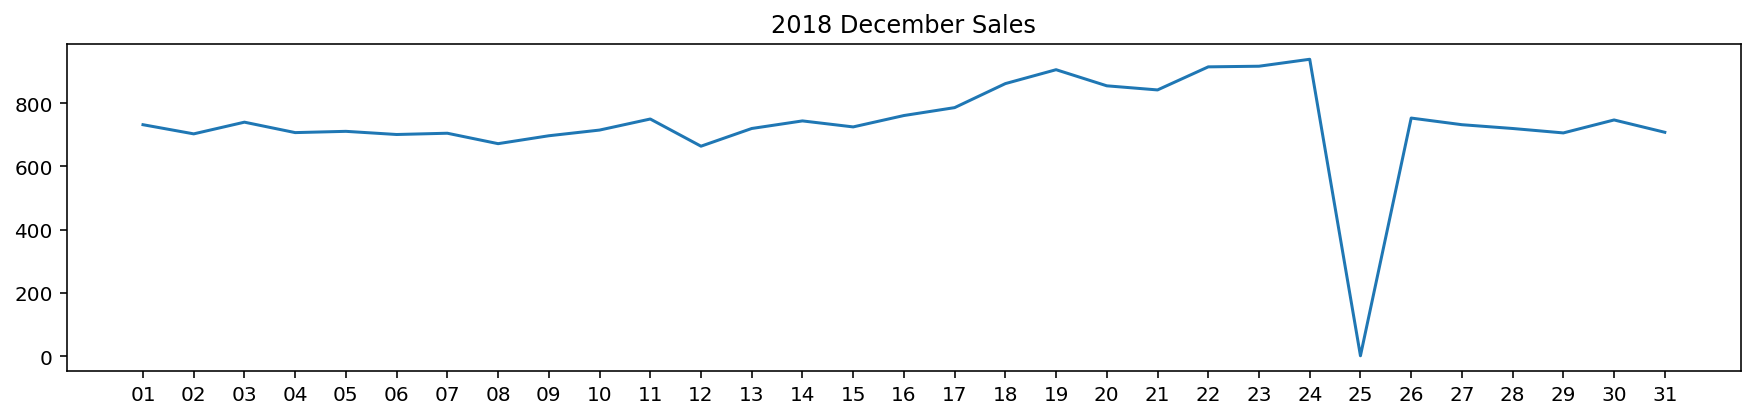

In [34]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

##### **The day with no transaction/sales was on 25th december,2018 which was a christmas day s0 all stores were closed.**

In [35]:
#Extracting the weights out from the PROD_QTY
merged_data['PACK_SIZE'] = merged_data['PROD_NAME'].str.extract("(\d+)")
merged_data['PACK_SIZE'] = pd.to_numeric(merged_data['PACK_SIZE'])
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,175
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160


In [36]:
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

##### Some products are written more than one time like Dorito & Doritos ,Grain & GrnWves etc. Now we are making them as single product in below steps.

In [37]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0]=="Red"].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, 150G]     1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]        1495
[Red, Rock, Deli, SR, Salsa, &, Mzzrlla, 150g]    1458
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]      1434
Name: PROD_NAME, dtype: int64

In [38]:
merged_data["Cleaned_Brand_Names"]=merged_data["PROD_NAME"].str.split().str[0]

In [39]:
def clean_brand_names(line):
    brand=line["Cleaned_Brand_Names"]
    if brand=="Dorito":
      return"Doritos"
    elif brand=="Grain" or brand=="GrnWves":
      return "Grain Waves"
    elif brand=="infzns":
      return "Infuzions"
    elif brand=="Natural" or brand== "NCC":
     return "Natural chip co"
    elif brand=="Red":
     return "RRD"
    elif brand=="Smith":
     return "Smiths"
    elif brand=="Snbts":
     return "Sunbites"
    elif brand=="WW":
     return "Woolworths"
    else:
     return brand

In [40]:
merged_data["Cleaned_Brand_Names"]=merged_data.apply(lambda line:clean_brand_names(line),axis=1)

<AxesSubplot: >

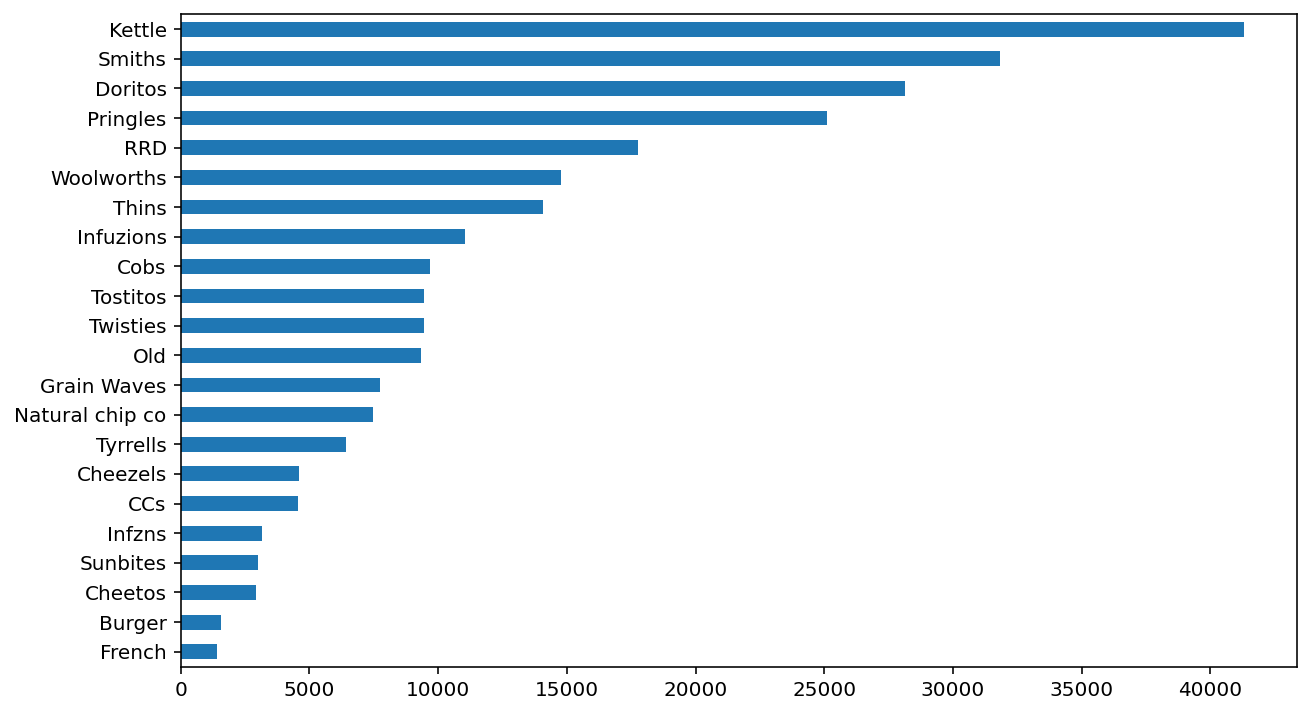

In [41]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,6))

In [42]:
merged_data.isnull().sum()

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
PACK_SIZE              0
Cleaned_Brand_Names    0
dtype: int64

#### **AIM:**

**1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?<br>**
**2.How many customers are in each segment?**<br>
**3.How many chips are bought per customer by segment?**<br>
**4. What's the average chip price by customer segment?**<br>



In [43]:
list(prch_bvr.columns)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [44]:
prch_bvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [45]:
len(prch_bvr)

72637

In [46]:
prch_bvr["LIFESTAGE"].nunique()

7

In [47]:
prch_bvr['LIFESTAGE'].value_counts().sort_values(ascending=False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot: xlabel='count', ylabel='LIFESTAGE'>

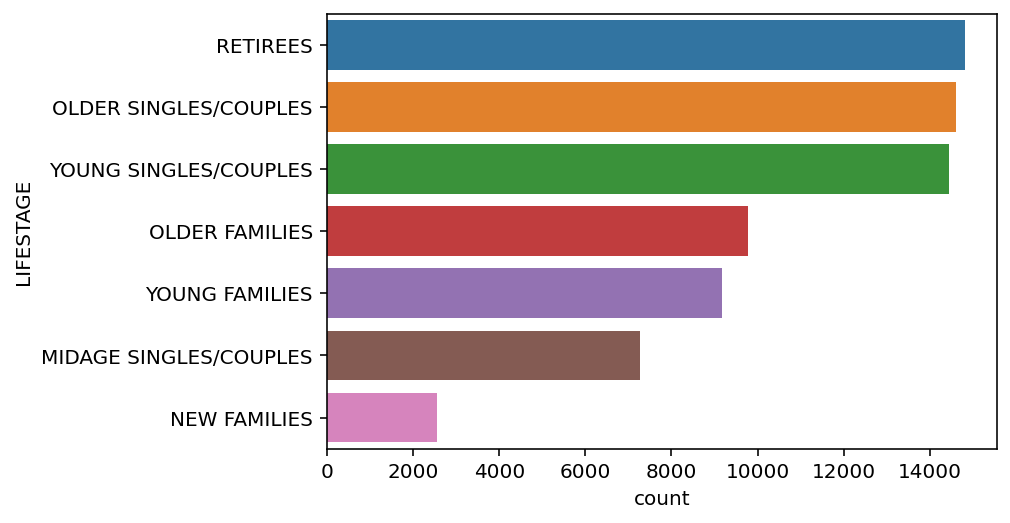

In [48]:
sns.countplot(y=prch_bvr['LIFESTAGE'],order=prch_bvr['LIFESTAGE'].value_counts().index)

In [49]:
prch_bvr['PREMIUM_CUSTOMER'].nunique()

3

In [50]:
prch_bvr['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Premium Customers')

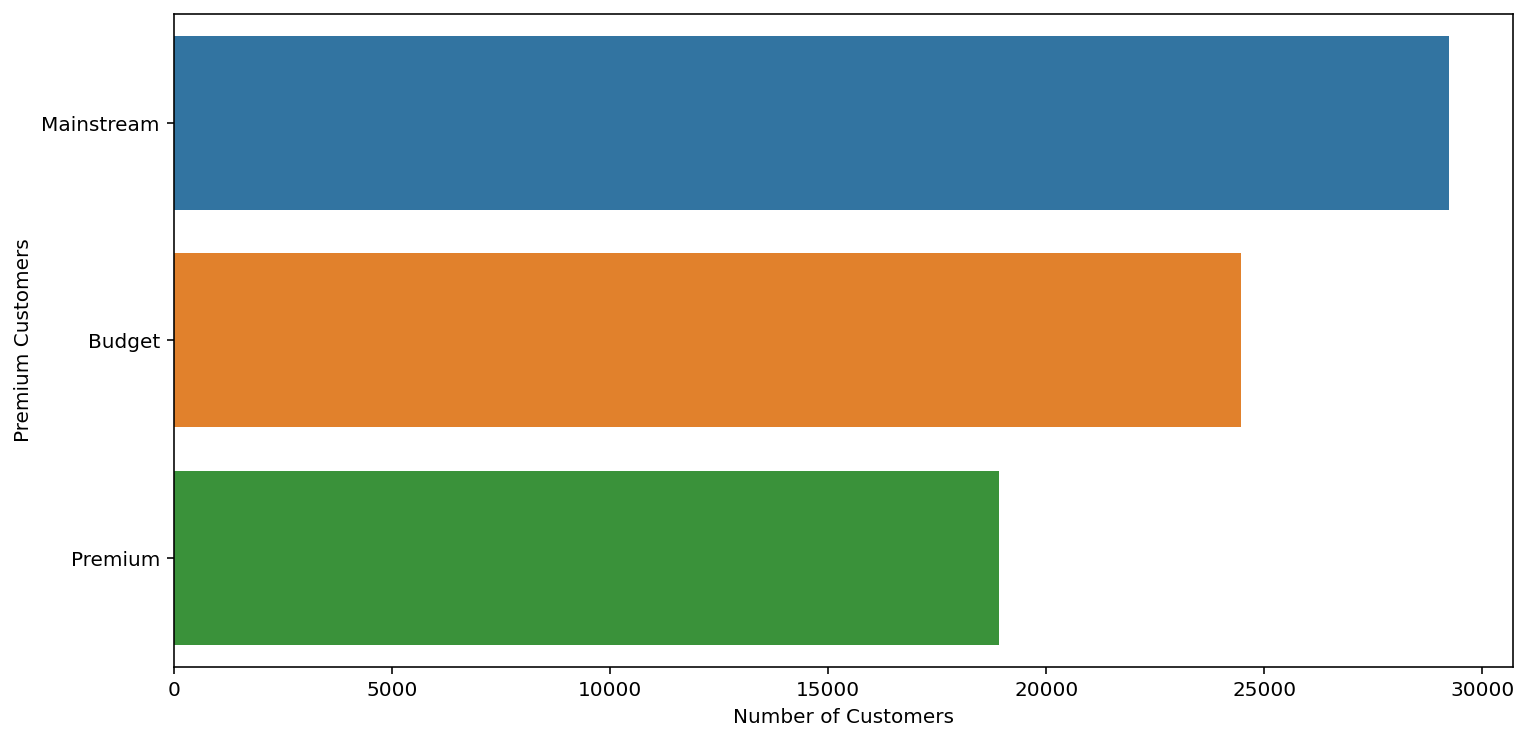

In [51]:
#Visualize
plt.figure(figsize=(12,6))
sns.countplot(y=prch_bvr['PREMIUM_CUSTOMER'],order=prch_bvr['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel("Number of Customers")
plt.ylabel("Premium Customers")

In [52]:
#Total sales of customer byPREMIUM_CUSTOMER , LIFESTAGE
sales=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace= True)
sales.sort_values(by='Total Sales',ascending=True,inplace=True)
sales

Total Sales
LIFESTAGE              PREMIUM_CUSTOMER             
NEW FAMILIES           Premium              11491.10
                       Mainstream           17013.90
                       Budget               21928.45
MIDAGE SINGLES/COUPLES Budget               35514.80
YOUNG SINGLES/COUPLES  Premium              41642.10
MIDAGE SINGLES/COUPLES Premium              58432.65
YOUNG SINGLES/COUPLES  Budget               61141.60
OLDER FAMILIES         Premium              80658.40
YOUNG FAMILIES         Premium              84025.50
MIDAGE SINGLES/COUPLES Mainstream           90803.85
YOUNG FAMILIES         Mainstream           92788.75
RETIREES               Premium              97646.05
OLDER FAMILIES         Mainstream          103445.55
RETIREES               Budget              113147.80
OLDER SINGLES/COUPLES  Premium             132263.15
                       Mainstream          133393.80
                       Budget              136769.80
YOUNG FAMILIES         Budget              139345.85
RETIREES               Mainstream          155677.05
YOUNG SINGLES/COUPLES  Mainstream          157621.60
OLDER FAMILIES         Budget              168363.25

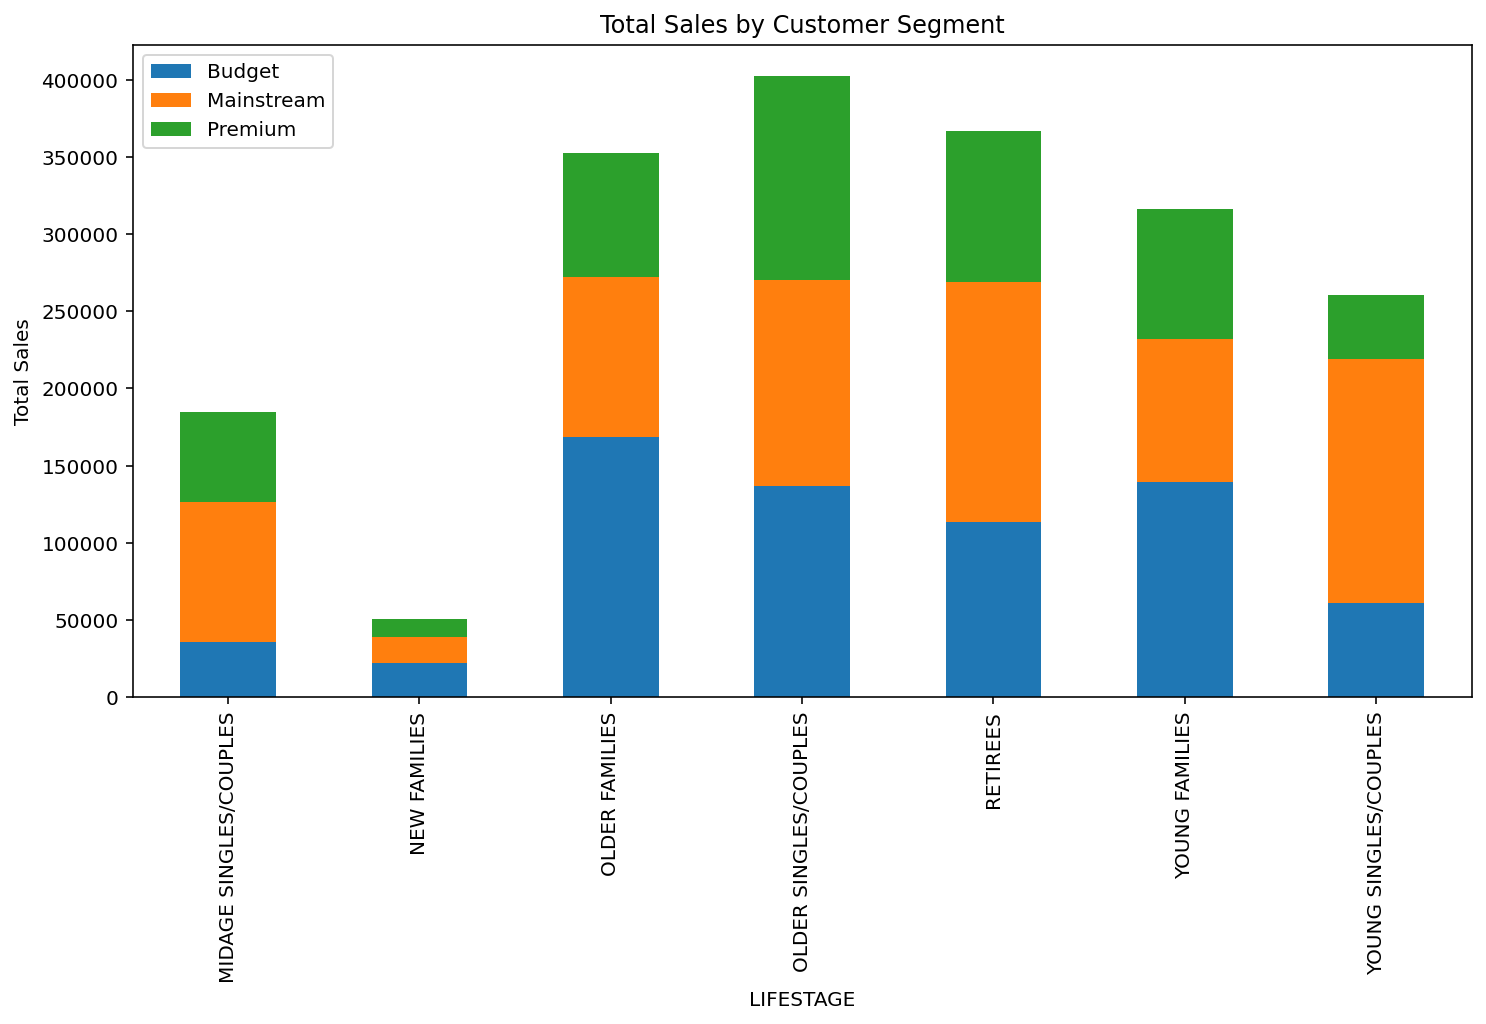

In [53]:
#Visualize
salesplot=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesplot.unstack().plot(kind='bar',stacked=True,figsize=(12,6),title='Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget','Mainstream','Premium'],loc=2)

**The top 3 total sales contributor segment are (in order):**<br>
1.Older Families(Budget)<br>
2.Young Singles/Couples (Mainstream)<br>
3.Retirees (Mainstream)<br>

In [54]:
#Number of Customers by PREMIUM_CUSTOMER, LIFESTAGE
cust=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
cust.rename(columns={'LYLTY_CARD_NBR': 'Number of Customers'}, inplace=True)
cust.sort_values(by='Number of Customers',ascending=False,inplace=True)
cust

Number of Customers
LIFESTAGE              PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES  Mainstream                       8088
RETIREES               Mainstream                       6479
OLDER SINGLES/COUPLES  Mainstream                       4930
                       Budget                           4929
                       Premium                          4750
OLDER FAMILIES         Budget                           4675
RETIREES               Budget                           4454
YOUNG FAMILIES         Budget                           4017
RETIREES               Premium                          3872
YOUNG SINGLES/COUPLES  Budget                           3779
MIDAGE SINGLES/COUPLES Mainstream                       3340
OLDER FAMILIES         Mainstream                       2831
YOUNG FAMILIES         Mainstream                       2728
YOUNG SINGLES/COUPLES  Premium                          2574
YOUNG FAMILIES         Premium                          2433
MIDAGE SINGLES/COUPLES Premium                          2431
OLDER FAMILIES         Premium                          2273
MIDAGE SINGLES/COUPLES Budget                           1504
NEW FAMILIES           Budget                           1112
                       Mainstream                        849
                       Premium                           588

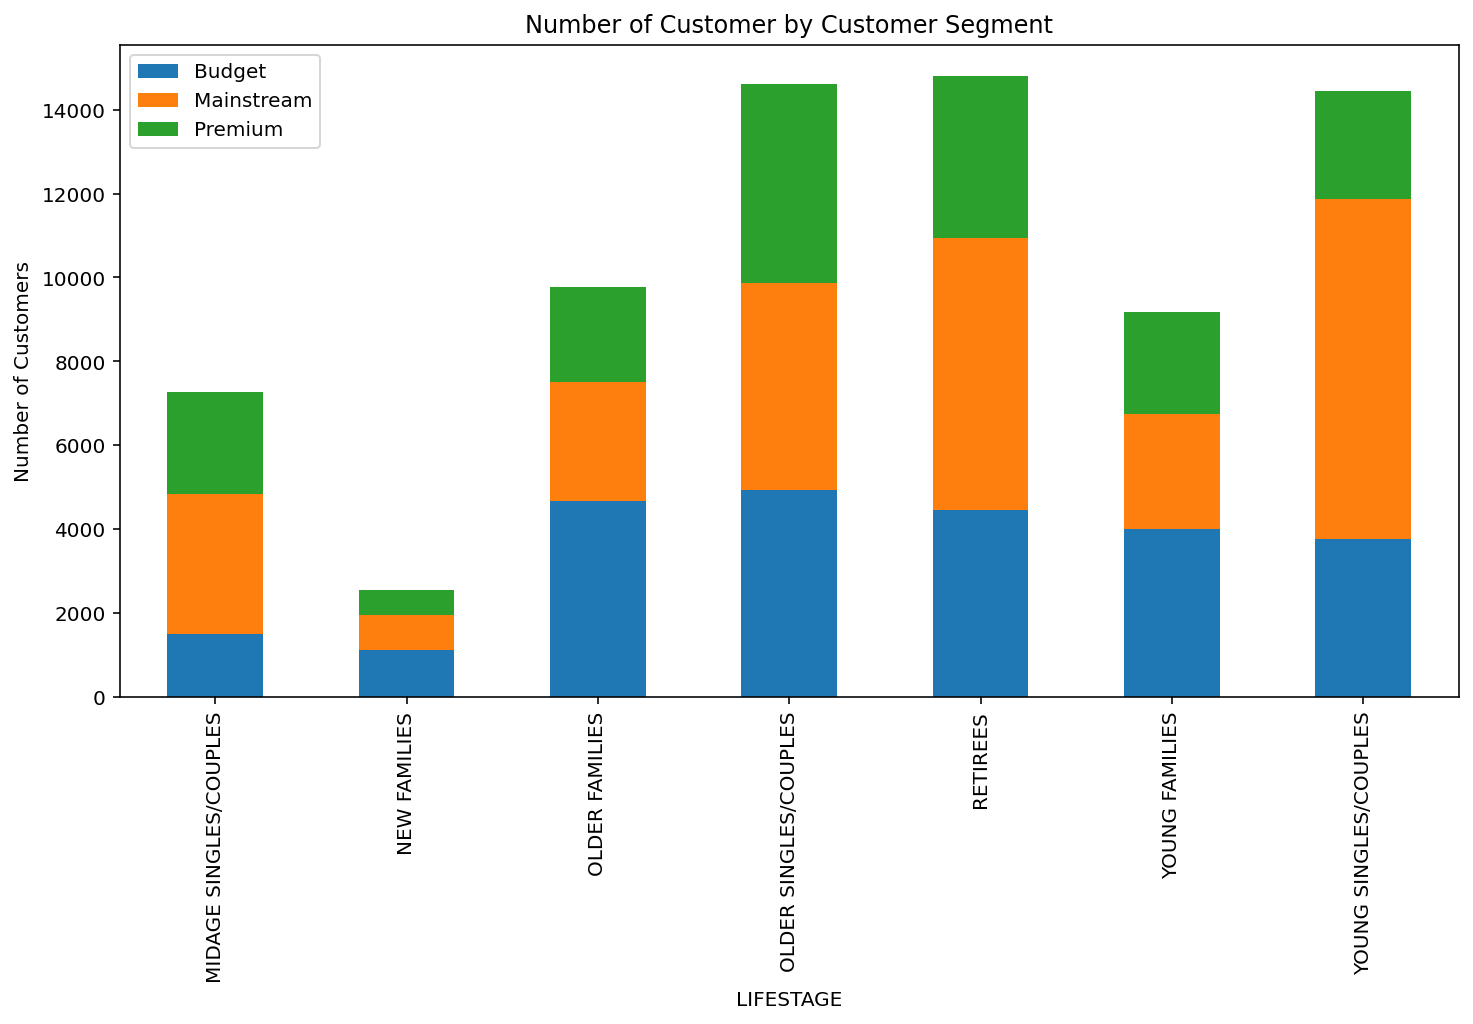

In [55]:
#Visualize
custplot=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
custplot.unstack().plot(kind='bar',stacked=True,figsize=(12,6),title='Number of Customer by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget','Mainstream','Premium'],loc=2)

**There are more  younger couples/singles(Mainstream) and Retires(Mainstream). These two segments contributes to more chips sales. However, this is not the major driver for the older families(Budget) due to low number of unique Customers.**

In [56]:
# Average Units per customer by PREMIUM_CUSTOMER, LIFESTAGE
avg_units=merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    6.313830
                  NEW FAMILIES              5.009892
                  OLDER FAMILIES            9.639572
                  OLDER SINGLES/COUPLES     7.145466
                  RETIREES                  6.458015
                  YOUNG FAMILIES            9.238486
                  YOUNG SINGLES/COUPLES     4.411485
Mainstream        MIDAGE SINGLES/COUPLES    6.796108
                  NEW FAMILIES              5.087161
                  OLDER FAMILIES            9.804309
                  OLDER SINGLES/COUPLES     7.098783
                  RETIREES                  6.253743
                  YOUNG FAMILIES            9.180352
                  YOUNG SINGLES/COUPLES     4.776459
Premium           MIDAGE SINGLES/COUPLES    6.386672
                  NEW FAMILIES              5.028912
                  OLDER FAMILIES            9.578091
                  OLDER SINGLES/COUPLES     7.154947
     

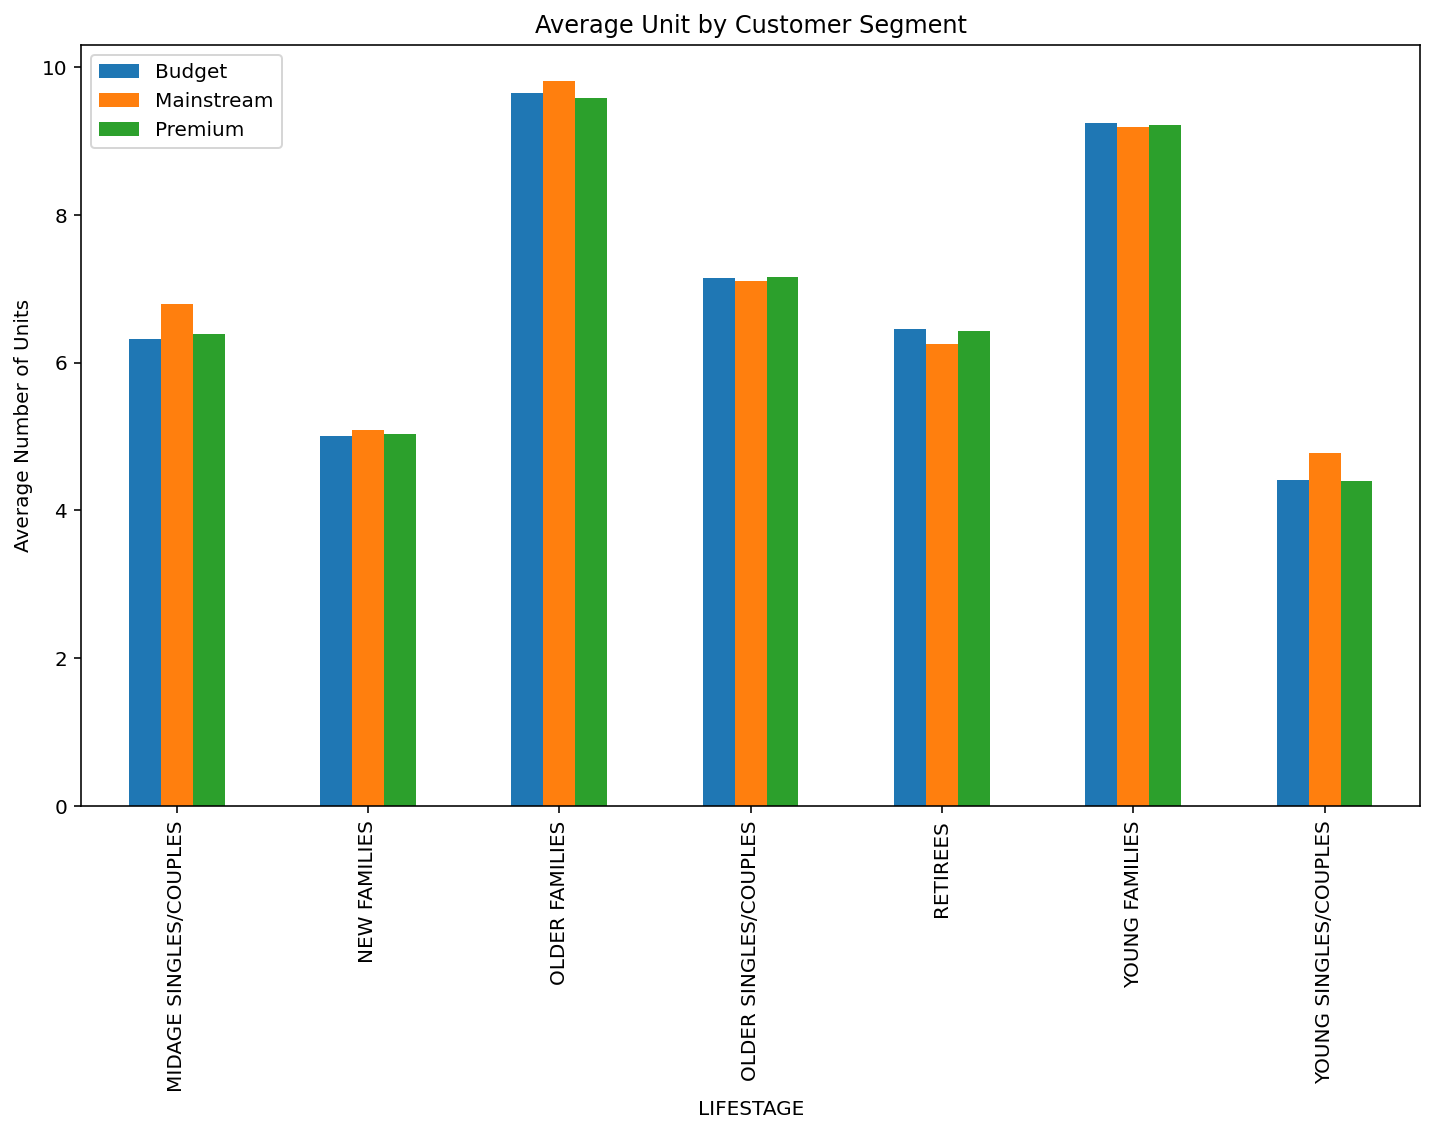

In [57]:
#isualize
avgUnitsPlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

**From the Graph output, we observed older Families and Young Families buy more chips per customer.**

In [58]:
#Average price per customer byPREMIUM_CUSTOMER , LIFESTAGE
avg_price = merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    3.739975
                  NEW FAMILIES              3.936178
                  OLDER FAMILIES            3.736009
                  OLDER SINGLES/COUPLES     3.883299
                  RETIREES                  3.933660
                  YOUNG FAMILIES            3.754840
                  YOUNG SINGLES/COUPLES     3.667542
Mainstream        MIDAGE SINGLES/COUPLES    4.000346
                  NEW FAMILIES              3.939315
                  OLDER FAMILIES            3.726962
                  OLDER SINGLES/COUPLES     3.811578
                  RETIREES                  3.842170
                  YOUNG FAMILIES            3.705029
                  YOUNG SINGLES/COUPLES     4.080079
Premium           MIDAGE SINGLES/COUPLES    3.763535
                  NEW FAMILIES              3.886067
                  OLDER FAMILIES            3.704855
                  OLDER SINGLES/COUPLES     3.891695
     

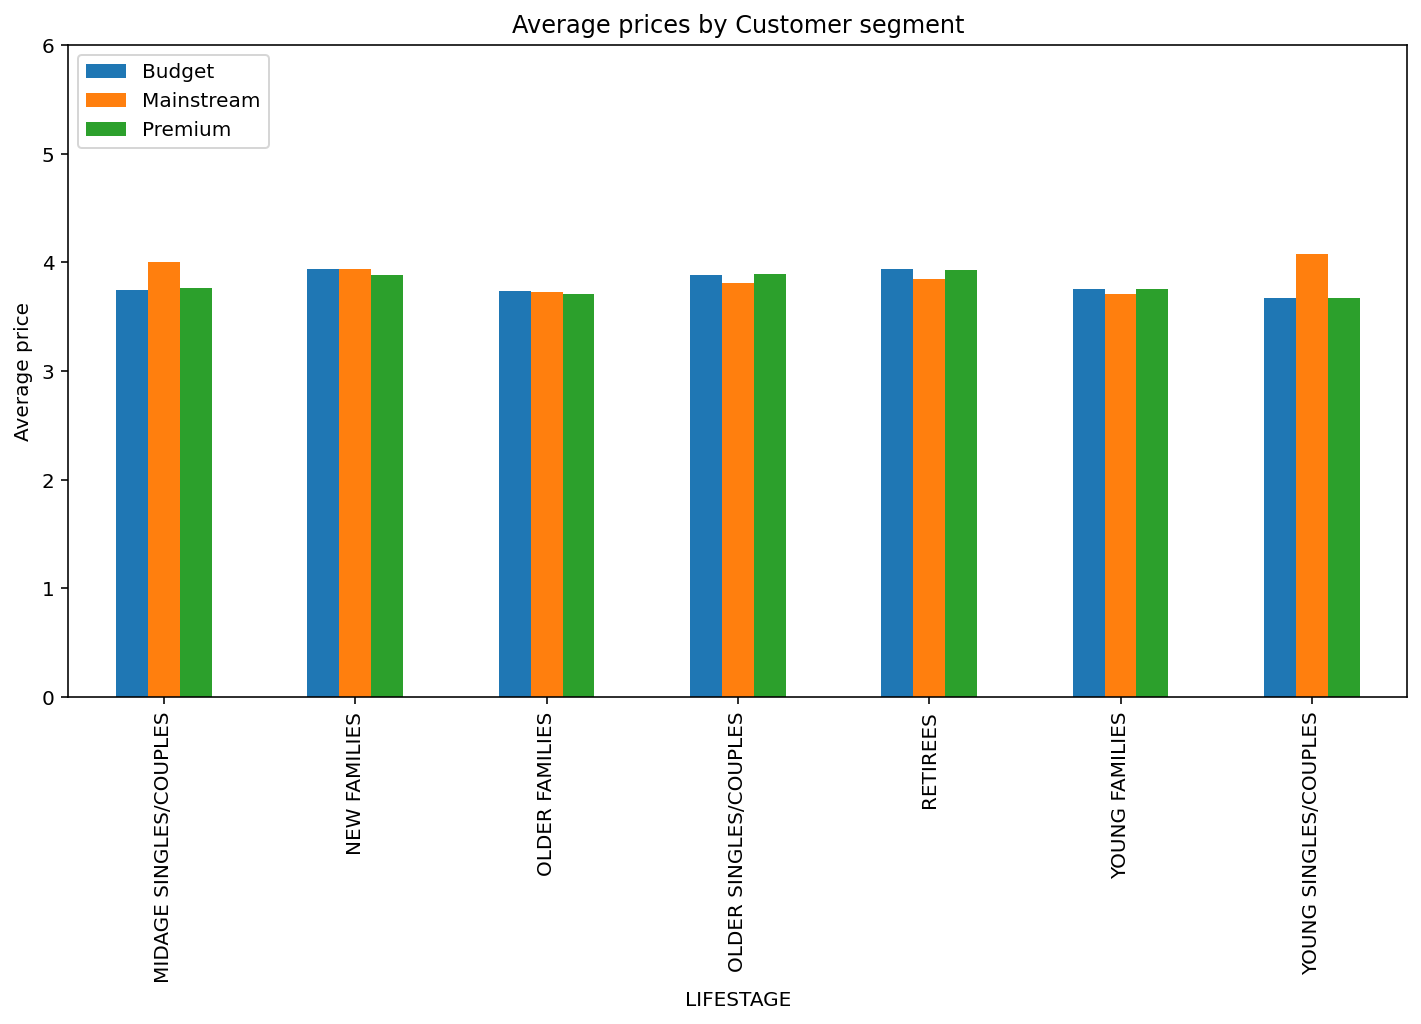

In [59]:
#Visualize
avg_priceplot=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum()/merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())
avg_priceplot.unstack().plot(kind='bar',figsize=(12,6),title='Average prices by Customer segment',ylim = (0, 6))
plt.ylabel('Average price')
plt.legend(['Budget','Mainstream','Premium'],loc=2)

**Midage singles/couples(Mainstream) and young singles/couples(Mainstream) are paying more per packets then other 2 premium customer Budgets & Premium. This may be due to premium shoppers being more likely to buy healthy snacks and where chips are mostly used for entertainment purpose.**

In [60]:
PricePerUnit=merged_data
PricePerUnit['PRICE']=merged_data['TOT_SALES']/merged_data['PROD_QTY']
PricePerUnit

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,Cleaned_Brand_Names,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural chip co,3.0
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150,RRD,2.7
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210,Grain Waves,3.6
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,175,Natural chip co,3.0
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160,Woolworths,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,YOUNG FAMILIES,Mainstream,210,Grain Waves,3.6
264832,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Premium,150,Kettle,4.6
264833,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,OLDER FAMILIES,Budget,165,Tyrrells,4.2
264834,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,OLDER FAMILIES,Budget,300,Old,5.1


In [61]:
#Grouping our Data into mainstream and nonmainstream
mainstream = PricePerUnit.loc[(PricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (PricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (PricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonmainstream = PricePerUnit.loc[(PricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (PricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (PricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price Per Unit')

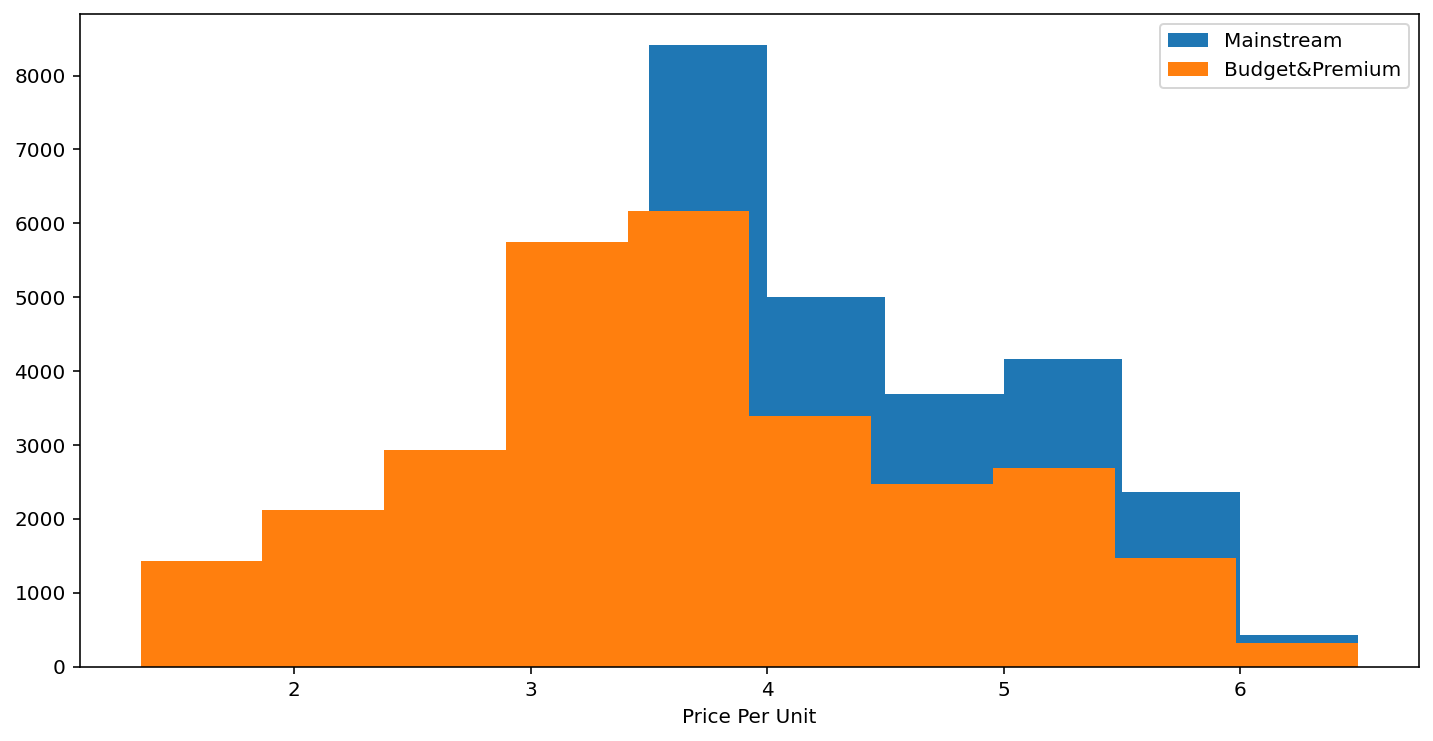

In [62]:
plt.figure(figsize=(12,6))
plt.hist(mainstream,label='Mainstream')
plt.hist(nonmainstream,label='Budget&Premium')
plt.legend()
plt.xlabel('Price Per Unit')

In [63]:
print("Mainstream Average price per unit is:${:.2f}".format(np.mean(mainstream)))
print("Non-Mainstream Average price per unit is :${:.2f}".format(np.mean(nonmainstream)))
if(np.mean(mainstream)>np.mean(nonmainstream)):
    print("Mainstream customers have higher average price per unit")
else:
    print("Non-mainstream customers have higher average price per unit")

Mainstream Average price per unit is:$4.05
Non-Mainstream Average price per unit is :$3.69
Mainstream customers have higher average price per unit


**Mainstream customers have higher average price per unit than other non-mainstream customers like Budget and premium customers**

In [64]:
target=merged_data.loc[(merged_data['LIFESTAGE'] =='YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'),:]
nontarget=merged_data.loc[(merged_data['LIFESTAGE'] != 'YOUNG SINGLES?COUPLES') & (merged_data['PREMIUM_CUSTOMER'] != 'Mainstream'),:]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,Cleaned_Brand_Names,PRICE
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150,RRD,2.7
9,2018-09-09,1,1010,10,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream,170,Doritos,4.4
10,2018-12-14,1,1010,11,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,YOUNG SINGLES/COUPLES,Mainstream,300,Old,5.1
21,2018-09-03,1,1018,22,3,Kettle Sensations Camembert & Fig 150g,1,4.6,YOUNG SINGLES/COUPLES,Mainstream,150,Kettle,4.6
22,2018-11-28,1,1018,23,97,RRD Salt & Vinegar 165g,1,3.0,YOUNG SINGLES/COUPLES,Mainstream,165,RRD,3.0


#### **AFFINITY TO BRAND**

In [65]:
# Target Segment
targetBrand = target.loc[:, ['Cleaned_Brand_Names', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('Cleaned_Brand_Names')['Target Brand Affinity'].sum())

# Non-target segment
nontargetBrand = nontarget.loc[:, ['Cleaned_Brand_Names', 'PROD_QTY']]
nontargetSum = nontargetBrand['PROD_QTY'].sum()
nontargetBrand['Non-Target Brand Affinity'] = nontargetBrand['PROD_QTY'] / nontargetSum
nontargetBrand = pd.DataFrame(nontargetBrand.groupby('Cleaned_Brand_Names')['Non-Target Brand Affinity'].sum())

In [66]:
brand_proportions = pd.merge(targetBrand, nontargetBrand, left_index = True, right_index = True)
brand_proportions

,Target Brand Affinity,Non-Target Brand Affinity
Cleaned_Brand_Names,,
Burger,0.002744,0.006211
CCs,0.010484,0.017731
Cheetos,0.007533,0.011079
Cheezels,0.016851,0.017589
Cobs,0.041856,0.035742
Doritos,0.122877,0.104451
French,0.003702,0.005470
Grain Waves,0.030674,0.028855
Infuzions,0.046645,0.041598


In [67]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
Cleaned_Brand_Names,,,
Tyrrells,0.029587,0.023809,1.242653
Twisties,0.043306,0.035114,1.233298
Kettle,0.185649,0.153550,1.209048
Old,0.041598,0.034477,1.206537
Infzns,0.014004,0.011610,1.206166
Tostitos,0.042581,0.035384,1.203394
Pringles,0.111980,0.093828,1.193453
Doritos,0.122877,0.104451,1.176415
Cobs,0.041856,0.035742,1.171089


**young singles/couples(Mainstream ) are more likely to purchase Tyrrells chips compared to other brands.**

#### **AFFINITY TO PACK SIZE**

In [68]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nontargetSize = nontarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nontargetSum = nontargetSize['PROD_QTY'].sum()
nontargetSize['Non-Target Pack Affinity'] = nontargetSize['PROD_QTY'] / nontargetSum
nontargetSize = pd.DataFrame(nontargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [69]:
pack_proportions = pd.merge(targetSize, nontargetSize, left_index = True, right_index = True)
pack_proportions

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.002847,0.006008
90,0.005954,0.011967
110,0.099658,0.082942
125,0.002821,0.005747
134,0.111980,0.093828
135,0.013849,0.011967
150,0.155130,0.162991
160,0.006005,0.011852
165,0.052185,0.057749


In [70]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.029846,0.023185,1.287277
380,0.030156,0.023735,1.270520
330,0.057465,0.046879,1.225828
110,0.099658,0.082942,1.201541
134,0.111980,0.093828,1.193453
210,0.027309,0.023102,1.182129
135,0.013849,0.011967,1.157189
250,0.013460,0.011929,1.128385
170,0.075740,0.074965,1.010345


**From the above output  it looks like singles/couples(mainstream) are more likely to purchase 270gm pack size chips compared to other pack sizes.**

In [71]:
merged_data=merged_data.loc[merged_data['PACK_SIZE'] ==270,:]
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,Cleaned_Brand_Names,PRICE
64,2019-04-01,1,1060,68,15,Twisties Cheese 270g,1,4.6,YOUNG SINGLES/COUPLES,Mainstream,270,Twisties,4.6
123,2018-08-26,1,1114,130,113,Twisties Chicken270g,1,4.6,OLDER FAMILIES,Premium,270,Twisties,4.6
284,2019-06-09,1,1262,297,15,Twisties Cheese 270g,1,4.6,RETIREES,Premium,270,Twisties,4.6
301,2018-11-30,1,1278,315,113,Twisties Chicken270g,1,4.6,NEW FAMILIES,Mainstream,270,Twisties,4.6
311,2018-09-24,1,1287,325,15,Twisties Cheese 270g,2,9.2,RETIREES,Mainstream,270,Twisties,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264546,2019-02-19,272,272223,269956,113,Twisties Chicken270g,2,9.2,OLDER SINGLES/COUPLES,Budget,270,Twisties,4.6
264579,2019-01-29,272,272248,269993,113,Twisties Chicken270g,2,9.2,OLDER SINGLES/COUPLES,Mainstream,270,Twisties,4.6
264612,2018-07-13,272,272277,270026,15,Twisties Cheese 270g,2,9.2,NEW FAMILIES,Budget,270,Twisties,4.6
264713,2018-09-10,272,272346,270130,113,Twisties Chicken270g,2,9.2,RETIREES,Premium,270,Twisties,4.6


In [72]:
merged_data.loc[merged_data['PACK_SIZE']==270 ,'Cleaned_Brand_Names'].unique()

array(['Twisties'], dtype=object)

**From all the Brands of chips Twisties are the only chips which are offering 270gm pack size.**

#### **TRENDS AND INSIGHTS;**

Top 3 sales contributor segment of chips are:
<ul>
    <li><b>Older families (Budget)</b></li>
    <li><b>Young Singles/Couples (Mainstream)</b></li>
    <li><b>Retirees (Mainstream)</b></li>
</ul>

<b>1. Young Singles/Couples (Mainstream) and Retirees (Mainstream) have higher  population than Older Families(Budget)  which explains there high total sales.</b>

<b>2.Midage singles/couples(Mainstream) and young singles/couples(Mainstream) are paying more per packets then other 2 premium customer Budgets and Premium </b><br>
      <p> . Mainstream customers have higher average price per unit than other non-mainstream customers like Budget and premium customers</p><br>
      <p>  .  young singles/couples(Mainstream ) are more likely to purchase Tyrrells chips compared to other brands.</p>

<b>3. Mainstream customers are mostly likely to purchase 270gm of "Twisties" brand chips.  </b>